<a href="https://www.kaggle.com/code/hajarhanifah/multinomial-logistic-regression-2-aneka-industri?scriptVersionId=100223391" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df-aneka-industri-2021-multinomial/dataset financial data ratio aneka industri 2021 (1).csv


***
# Multinomial Logistic Regression NPL Score -  Emiten Aneka Industri sub sektor Mesin dan Komponen Industri  Q4 2021 -  HAJAR HANIFAH 
***

Tujuan penelitian ini adalah melakukan Multinomial Logistic Regression, mencari NPL Score terhadap data seluruh emiten saham di sektor aneka industri untuk sub sektor Mesin dan Komponen Industri Q4 2021. 
Adapun beberapa step yang akan dilakukan adalah 
1. Import Libraries
2. Exploratory Data Analysis
    - Data Understanding
    - Understanding the Table
    - Load Data
    - Modeling
3. Multinomial logistic regression with scikit-learn
    - Data Preparation
    - Fit the Model
    - Standardize the Data
    - Model Validation
    - Probabilitas
 4. Conclution

menggunakan rasio :

- X1. DER = Total Debt / Total Equity
- X2. Return on Asset = Net Income / total Asset
- X3. Sales Growth = (Sales 2021 - sales 2020)/ sales 2020
- X4. Others
- X5 : others
- Y. Performance / Category = Using Clustering result yang hasilnya didapatkan dari [Clustering Sektor Industri - Aneka Industri 2021](https://www.kaggle.com/code/hajarhanifah/clustering-sektor-industri-hajar-hanifah/edit/run/93274745)

***
# 1. Import Libraries
***

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt



import statsmodels.api as sm

# readable figures
pd.set_option('float_format', '{:f}'.format)

***
# 2. Exploratory Data Analysis
***


# 2.1 Data Understanding

Data yang diambil merupakan data statictical financial ratio Q4 2021 dan 2020 untuk seluruh emiten di sektor Industri.

Data di dapatkan dari [IDX - Laporan Statistic Financial Data Ratio](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)


# 2.2 Understanding The Table

* **Emiten :** Pihak yang melakukan penawaran umum, yaitu penawaran efek yang dilakukan oleh emiten untuk menjual efek kepada masyarakat berdasarkan tata cara yang diatur dalam peraturan undang-undang yang berlaku. 
* **Sales Growth :** Kenaikan jumlah penjualan dari tahun ke tahun atau dari waktu ke waktu.
* **ROA (Return of Asset) :** Indikator untuk menunjukkan seberapa untuk sebuah perusahaan dibandingkan dengan total asetnya. 
* **DER (Debt to Equity Ratio) :** Rasio hutang terhadap ekuitas atau rasio keuangan yang membandingkan jumlah hutang dengan ekuitas

Keterangan rasio yang akan digunakan : 
- **DER =** Total Uang / Total Ekuitas
- **Return on Asset =** Laba setelah pajak / Total Asset 
- **Sales Growth =** (penjualan periode 2021 - penjualan periode 2020)/ penjualan periode 2020

Berdasarkan Hasil Clustering dari setiap kategori (nilai Y) untuk emiten sektor Industri tahun 2020-2021, diketahui
- **kategori 0** : Kluster Negatif / Buruk
- **Kategori 1** : Kluster Netral
- **Kategori 2** : Kluster Positif / Baik
- **Kategori 3** : Kluster Sangat Negatif / Sangat Buruk
- **Kategori 4** : Kluster Sangat Positif / Sangat Baik


# 2.3 Load Data

In [3]:
df = pd.read_csv('../input/df-aneka-industri-2021-multinomial/dataset financial data ratio aneka industri 2021 (1).csv')
df.head()

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.320000,0.060000,0.330000,0.130000,0.120000,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.140000,-0.050000,0.410000,-0.120000,-0.130000,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.490000,0.050000,0.030000,0.070000,0.130000,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.970000,-0.020000,0.220000,-0.080000,-0.160000,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.510000,0.210000,0.170000,0.320000,0.250000,4


In [4]:
df.describe()

,No,DER,ROA,Sales Growth,ROE,NPM,Category
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,1.897586,0.025517,0.304483,0.021379,-0.053448,1.517241
std,8.514693,3.366741,0.103909,0.431456,0.241568,0.420300,1.121883
min,1.000000,-2.860000,-0.320000,-0.280000,-0.930000,-1.990000,0.000000
25%,8.000000,0.510000,-0.020000,0.030000,-0.080000,-0.050000,1.000000
50%,15.000000,0.880000,0.020000,0.220000,0.040000,0.040000,1.000000
75%,22.000000,1.910000,0.060000,0.410000,0.130000,0.130000,1.000000
max,29.000000,16.330000,0.310000,1.440000,0.520000,0.400000,4.000000


In [5]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.320000,0.060000,0.330000,0.130000,0.120000,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.140000,-0.050000,0.410000,-0.120000,-0.130000,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.490000,0.050000,0.030000,0.070000,0.130000,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.970000,-0.020000,0.220000,-0.080000,-0.160000,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.510000,0.210000,0.170000,0.320000,0.250000,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.880000,0.030000,0.300000,0.060000,0.070000,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.310000,0.110000,0.790000,0.140000,0.170000,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.280000,-0.050000,-0.170000,-0.160000,-0.540000,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.380000,0.120000,0.680000,0.290000,0.210000,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.670000,0.010000,0.670000,0.010000,0.010000,1


***
# 3. Multinomial logistic regression with scikit-learn
***

Step : 
- assign predictors dan kriteria untuk setiap objek
- Bagi datensatz menjadi bagian pelatihan dan pengujian (trainX dan testingX) 
- split x dan Y
- Y = categori yang didapatkan dari hasil clustering yang dilakukan sebelumnya
- buat variabel training dan testing

In [6]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.320000,0.060000,0.330000,0.130000,0.120000,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.140000,-0.050000,0.410000,-0.120000,-0.130000,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.490000,0.050000,0.030000,0.070000,0.130000,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.970000,-0.020000,0.220000,-0.080000,-0.160000,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.510000,0.210000,0.170000,0.320000,0.250000,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.880000,0.030000,0.300000,0.060000,0.070000,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.310000,0.110000,0.790000,0.140000,0.170000,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.280000,-0.050000,-0.170000,-0.160000,-0.540000,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.380000,0.120000,0.680000,0.290000,0.210000,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.670000,0.010000,0.670000,0.010000,0.010000,1


**Drop Irrelevant Data untuk variabel X**

In [7]:
x = df.drop(['Category','No','Industri','Company','Emiten'], axis=1)
x.head()

,DER,ROA,Sales Growth,ROE,NPM
0,1.320000,0.060000,0.330000,0.130000,0.120000
1,1.140000,-0.050000,0.410000,-0.120000,-0.130000
2,0.490000,0.050000,0.030000,0.070000,0.130000
3,3.970000,-0.020000,0.220000,-0.080000,-0.160000
4,0.510000,0.210000,0.170000,0.320000,0.250000


In [8]:
y = df['Category']
y.head()

0    1
1    1
2    1
3    1
4    4
Name: Category, dtype: int64

# 3.2 Standardize the Data

In [9]:
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
x_scaled = StandardScaler().fit_transform(x)
data_scaled = pd.DataFrame(x_scaled, columns=df.columns.drop(['Industri','Company','Emiten','Category','ROE']))

data_scaled

,No,DER,ROA,Sales Growth,NPM
0,-0.174593,0.337730,0.060189,0.457607,0.419982
1,-0.229004,-0.739629,0.248890,-0.595616,-0.185360
2,-0.425486,0.239788,-0.647439,0.204834,0.444196
3,0.626450,-0.445804,-0.199274,-0.427100,-0.258001
4,-0.419440,1.806855,-0.317212,1.258057,0.734760
5,-0.307597,0.043905,-0.010574,0.162705,0.298914
6,-0.479896,0.827438,1.145218,0.499736,0.541050
7,0.115596,-0.739629,-1.119190,-0.764131,-1.178121
8,-0.156456,0.925380,0.885755,1.131670,0.637905
9,-0.371075,-0.151978,0.862167,-0.047940,0.153632


In [10]:
display(df)

,No,Industri,Company,Emiten,DER,ROA,Sales Growth,ROE,NPM,Category
0,1,Industrial Machinery & Components,Asahimas Flat Glass Tbk,AMFG,1.320000,0.060000,0.330000,0.130000,0.120000,1
1,2,Industrial Machinery & Components,PT Ateliers Mecaniques D Indonesie Tbk.,AMIN,1.140000,-0.050000,0.410000,-0.120000,-0.130000,1
2,3,Industrial Machinery & Components,PT Arita Prima Indonesia Tbk.,APII,0.490000,0.050000,0.030000,0.070000,0.130000,1
3,4,Industrial Machinery & Components,PT Arkha Jayanti Persada Tbk.,ARKA,3.970000,-0.020000,0.220000,-0.080000,-0.160000,1
4,5,Industrial Machinery & Components,Arwana Citramulia Tbk,ARNA,0.510000,0.210000,0.170000,0.320000,0.250000,4
5,6,Industrial Machinery & Components,Cahayaputra Asa Keramik Tbk,CAKK,0.880000,0.030000,0.300000,0.060000,0.070000,1
6,7,Industrial Machinery & Components,Communication Cable Systems Indonesia Tbk,CCSI,0.310000,0.110000,0.790000,0.140000,0.170000,4
7,8,Industrial Machinery & Components,Citatah Tbk,CTTH,2.280000,-0.050000,-0.170000,-0.160000,-0.540000,1
8,9,Industrial Machinery & Components,Hexindo Adiperkasa Tbk,HEXA,1.380000,0.120000,0.680000,0.290000,0.210000,4
9,10,Industrial Machinery & Components,Sumi Indo Kabel Tbk,IKBI,0.670000,0.010000,0.670000,0.010000,0.010000,1


**Split Data, tentukan X train, Y train, X test dan Y test**

In [11]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

Diketahui :
- training size : 70%
- testing size : 30%

semakin besar data training, semakin besar akurasi

# 3.3. Multinomial Logit with the statsmodel library

In [12]:
mnlogit_mod = sm.MNLogit(y,sm.add_constant(data_scaled))
mnlogit_fit = mnlogit_mod.fit(method='bfgs')

print (mnlogit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   29
Model:                        MNLogit   Df Residuals:                        5
Method:                           MLE   Df Model:                           20
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                   1.000
Time:                        04:11:43   Log-Likelihood:            -0.00037979
converged:                       True   LL-Null:                       -26.785
Covariance Type:            nonrobust   LLR p-value:                 6.699e-05
  Category=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.4679   6890.967

# 3.4 Fit The Model

**Y Prediction**

In [13]:
logistic_regresion = LogisticRegression(multi_class='auto').fit(x,y)
y_pred = logistic_regresion.predict(testX)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 1])

multiclass = auto , agar dapat mengenerate secara otomatis Y nya apa saja (categori 0,1, 2, 3 4) sesuai dengan nilai Y- nya

**Intercept**

In [14]:
print('Intercept :', logistic_regresion.intercept_)

Intercept : [-5.43616632  3.93807952 -0.82916441  0.42773238  1.89951884]


**Koefisien**

In [15]:
print(logistic_regresion.coef_)

[[ 0.96676318 -0.00402755 -0.09958339 -0.08469312 -0.01798341]
 [ 0.03128648 -0.22798664 -1.20875198 -0.58734021  0.08282493]
 [ 0.5682376  -0.00301388  0.85484969  0.13319329  0.04347885]
 [-1.09240544 -0.11833112 -0.17970715 -0.02731978 -0.64963306]
 [-0.47388182  0.35335919  0.63319283  0.56615983  0.54131269]]


# 3.4 Model Validation / Testing The Model

**Mendapatkan Prediction test menggunakan model**

In [16]:
prediction_test = logistic_regresion.predict(testX)

**Print akurasi dan error rate**

In [17]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.89
Error rate: 0.11


**Matrix**

In [18]:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[7 0 0]
 [0 1 0]
 [1 0 0]]


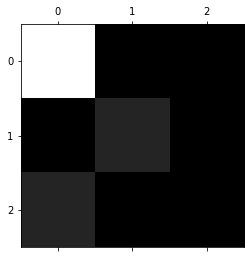

In [19]:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

# 3.5 Probabilitas

Adapun peluang yang dimiliki untuk mendapatkan probabilitas dari kelas yang diprediksi adalah

In [20]:
probability = logistic_regresion.predict_proba(testX)
probability

array([[1.52501973e-03, 9.38036039e-01, 4.14907852e-02, 1.11968336e-03,
        1.78284723e-02],
       [1.96704862e-04, 8.07488500e-01, 2.00383981e-02, 1.41400558e-02,
        1.58136341e-01],
       [5.16137463e-04, 6.76003471e-01, 6.16137293e-02, 8.81676585e-03,
        2.53049896e-01],
       [2.39507615e-04, 7.12589453e-01, 3.49211788e-02, 1.99757082e-02,
        2.32274152e-01],
       [3.83150542e-04, 9.10124162e-01, 2.32385183e-02, 5.30517346e-03,
        6.09489958e-02],
       [1.47926844e-04, 8.34582788e-01, 1.44005568e-02, 1.57295227e-02,
        1.35139206e-01],
       [1.59207540e-04, 8.58184559e-01, 1.42457375e-02, 1.39961881e-02,
        1.13414308e-01],
       [9.32080732e-02, 1.39828128e-01, 7.65792102e-01, 7.11067189e-07,
        1.17098620e-03],
       [3.13059612e-04, 8.54137469e-01, 2.84586316e-02, 1.10582739e-02,
        1.06032566e-01]])

- Setiap kolom merepresentasikan class
- class dengan probabilitas paling tinggi = output dari predicted class


In [21]:
print(probability.shape[0])
print(testX.shape[0])

9
9


Disini, kita dapat melihat bahwa panjang data probabilitas (9) = panjang data uji (9)

In [22]:
#data_result = pd.DataFrame(logistic_regresion.coef_, columns=x.columns)
#data_result['intercept'] = log_reg_result.intercept_
#data_result['class'] = logistic_regresion.classes_

#data_result

In [23]:
data_result = pd.DataFrame(logistic_regresion.predict_proba(testX), columns=logistic_regresion.classes_)
data_result

,0,1,2,3,4
0,0.001525,0.938036,0.041491,0.001120,0.017828
1,0.000197,0.807488,0.020038,0.014140,0.158136
2,0.000516,0.676003,0.061614,0.008817,0.253050
3,0.000240,0.712589,0.034921,0.019976,0.232274
4,0.000383,0.910124,0.023239,0.005305,0.060949
5,0.000148,0.834583,0.014401,0.015730,0.135139
6,0.000159,0.858185,0.014246,0.013996,0.113414
7,0.093208,0.139828,0.765792,0.000001,0.001171
8,0.000313,0.854137,0.028459,0.011058,0.106033


**Sum / jumlah probabilitas harus selalu 1**

In [24]:
data_result['sum'] = data_result.sum(axis=1)
data_result

,0,1,2,3,4,sum
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000


**Lihat Predicted class**

In [25]:
data_result['predicted_class'] = y_pred
data_result

,0,1,2,3,4,sum,predicted_class
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1


**Actual Class**

In [26]:
data_result['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
data_result

,0,1,2,3,4,sum,predicted_class,actual_class
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1,1
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1,1
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1,1
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1,1
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1,1
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1,1
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2,2
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1,1


Dari data diatas, kita dapat melihat hasil dari prediksi setiap class. Untuk memudahkan dalam membaca prediksi, lakukan konversi kelas prediksi (prediction class) dan actual class menggunakan encoder label dari scikit-learn.

In [27]:
le = preprocessing.LabelEncoder()

data_result['label_pred'] = le.fit_transform(data_result['predicted_class'])
data_result['label_actual'] = le.fit_transform(data_result['actual_class'])
data_result

,0,1,2,3,4,sum,predicted_class,actual_class,label_pred,label_actual
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1,1,0,0
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1,1,0,0
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4,0,2
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1,1,0,0
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1,1,0,0
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1,1,0,0
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1,1,0,0
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2,2,1,1
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1,1,0,0


Di sini kita melihat bahwa dua variabel (predicted_class & actual_class) diberi kode yang sama 


In [28]:
targets = data_result['predicted_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{1: 0, 2: 1}

In [29]:
targets = data_result['actual_class']   
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{1: 0, 4: 2, 2: 1}

**Cek apakah prediksi class benar**

In [30]:
data_result['check'] = data_result['label_actual'] - data_result['label_pred']
data_result

,0,1,2,3,4,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1,1,0,0,0
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1,1,0,0,0
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4,0,2,2
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1,1,0,0,0
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1,1,0,0,0
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1,1,0,0,0
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1,1,0,0,0
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2,2,1,1,0
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1,1,0,0,0


In [31]:
data_result['correct_prediction?'] = np.where(data_result['check'] == 0, 'True', 'False')
data_result = data_result.drop(['label_pred', 'label_actual', 'check'], axis=1)
data_result

,0,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1,1,True
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1,1,True
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4,False
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1,1,True
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1,1,True
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1,1,True
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1,1,True
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2,2,True
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1,1,True


In [32]:
display(data_result)

,0,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
0,0.001525,0.938036,0.041491,0.001120,0.017828,1.000000,1,1,True
1,0.000197,0.807488,0.020038,0.014140,0.158136,1.000000,1,1,True
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4,False
3,0.000240,0.712589,0.034921,0.019976,0.232274,1.000000,1,1,True
4,0.000383,0.910124,0.023239,0.005305,0.060949,1.000000,1,1,True
5,0.000148,0.834583,0.014401,0.015730,0.135139,1.000000,1,1,True
6,0.000159,0.858185,0.014246,0.013996,0.113414,1.000000,1,1,True
7,0.093208,0.139828,0.765792,0.000001,0.001171,1.000000,2,2,True
8,0.000313,0.854137,0.028459,0.011058,0.106033,1.000000,1,1,True


**Gunakan nilai yang dihasilkan untuk mendapatkan / menghitung akurasi secara manual**

In [33]:
true_predictions = data_result[(data_result["correct_prediction?"] == 'True')].shape[0]
false_predictions = data_result[(data_result["correct_prediction?"] == 'False')].shape[0]
total = data_result["correct_prediction?"].shape[0]

print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 88.88888888888889


**Probabilitas kelas yang salah prediksi**

In [34]:
wrong_pred = data_result[(data_result["correct_prediction?"] == 'False')]
wrong_pred

,0,1,2,3,4,sum,predicted_class,actual_class,correct_prediction?
2,0.000516,0.676003,0.061614,0.008817,0.253050,1.000000,1,4,False


***
# 4. Multinomial Logit with the statsmodel library
***

In [35]:
x2 = sm.add_constant(data_scaled, prepend = False)

mnlogit_mod = sm.MNLogit(y, x2).fit(method='bfgs')

print (mnlogit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
                          MNLogit Regression Results                          
Dep. Variable:               Category   No. Observations:                   29
Model:                        MNLogit   Df Residuals:                        5
Method:                           MLE   Df Model:                           20
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                   1.000
Time:                        04:11:46   Log-Likelihood:            -0.00037979
converged:                       True   LL-Null:                       -26.785
Covariance Type:            nonrobust   LLR p-value:                 6.699e-05
  Category=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
No              -9.4023   6071.701

***
# 4. Kesimpulan
***

-  Regresi Logistik Multinomial dapat digunakan untuk memprediksi beberapa kelas
-  Dengan data yang ada, dilakukan validasi dengan testing size 30% menghasilkan akurasi data 88,88% 

Regresi multinomial dapat digunakan untuk memprediksi beberapa kelas, pada kasus ini, metode digunakan untuk memprediksi terjadinya penurunan secara finansial pada emiten sektor Aneka Industri sub sektor Mesin dan komponen Industri. Adapun rasio yang digunakan adalah Return of Asset (ROA), Ratio Return on Equity (ROE), Sales growth, Debt to Equity Ratio (DER), dan Net Profit Margin (NPM) berdasarkan indikator Kategori hasil dari clustering, dimana kelompok kategori dibagi menjadi 5 yaitu Sangat positif, Positif, Netral, Negatif dan Sangat Negatif. Hasil uji menunjukkan bahwa model yang digunakan sudah sangat baik dengan tingkat akurasi prediksi yaitu 89%.